## **Εξαγωγή χαρακτηριστηκών ήχου**

**Μετασχηματισμός Fourier (Fourier transform)**



In [2]:
#Εισαγωγή βιβλιοθηκών

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [3]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html) μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) συναρτήσει του χρόνου.

In [4]:
#Αρχικοποίηση αρχείων/δειγμάτων
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)

*Αν θέλαμε να φορτώσουμε κάποιο αρχείο ήχου από τον υπολογιστή μας τότε:*


```
 audiofile_path="/user/yourpcname/desktop/filename.wav"
 audio_sample, sr =librosa.load(audiofile_path)

```











> Στην συνέχεια μπορούμε να αναπαράγουμε το σήμα μέσω της βιβλιοθήκης [IPython](https://ipython.org/).



In [5]:
#Αναπαραγωγή ήχου
ipd.Audio(data=audio_sample,rate=sr)

> **Υπολογισμός μετασχηματισμού Fourier με την βιβλιοθήκη [numpy](https://numpy.org).**



> Ο υπολογισμός του διακριτού μετασχηματισμού Fourier (Discrete fourier transform) γίνεται μέσω αλγορίθμου Fast Fourier Transform. Η συνάρτηση μας επιστρέφει έναν πίνακα μηγαδικών αριθμών.





> Για πηγαίο κώδικα [np.fft](https://numpy.org/doc/stable/reference/routines.fft.html).

In [6]:
audio_sample_ft=np.fft.fft(audio_sample)

In [7]:
#Πλάτος μετασχηματισμού Fourier
FtMagSpec=np.abs(audio_sample_ft)

**Γραφική επεικόνιση φάσματος**

Text(0.5, 1.0, 'Magnitude spectrum')

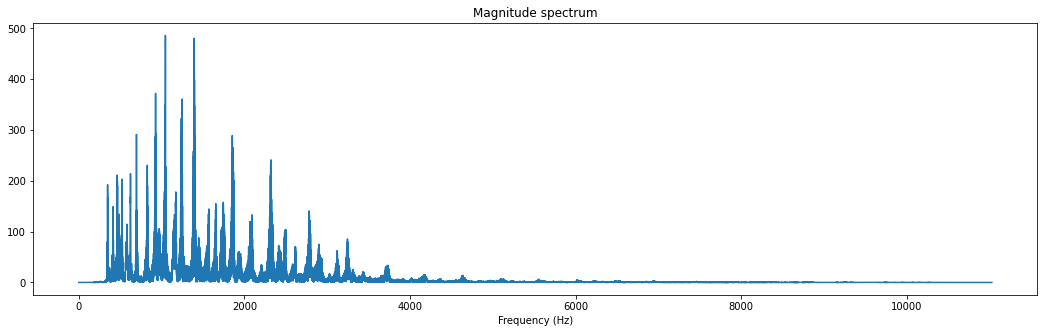

In [13]:
plt.figure(figsize=(18, 5))

#Επιστρέφει ομοιόμορφα κατανεμημένους αριθμούς σε ένα καθορισμένο διάστημα   
f = np.linspace(0, sr, len(FtMagSpec))
f_bins = int(len(FtMagSpec)*0.5)  
    
plt.plot(f[:f_bins], FtMagSpec[:f_bins])
plt.xlabel('Frequency (Hz)')
plt.title('Magnitude spectrum')



>**Υπολογισμός μετασχηματισμού Fourie μιρκής διάρκειας με την βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html).**

>Υπολογισμός του διακριτού μετασχηματισμού Fourier (Discrete fourier transform) για μικρής διάρκειας επικαλυπτόμενα παράθυρα. Για πηγαίο κώδικα [librosa.stft](https://librosa.org/doc/latest/generated/librosa.stft.html?highlight=stft#librosa.stft).

In [15]:
S_audio_sample = librosa.stft(audio_sample,n_fft=FRAME_SIZE,hop_length=HOP_LENGTH)

In [17]:
#Υπολογισμός της ενέργειας από το πλάτος
Y_audio_sample= np.abs(S_audio_sample)**2

In [18]:
#Ορισμός συνάρτησης εμφάνισης φασματογραφήματος
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))

    #Εμφάνιση με χρήση της βιβλιοθήκης librosa
    #https://librosa.org/doc/main/generated/librosa.display.specshow.html
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

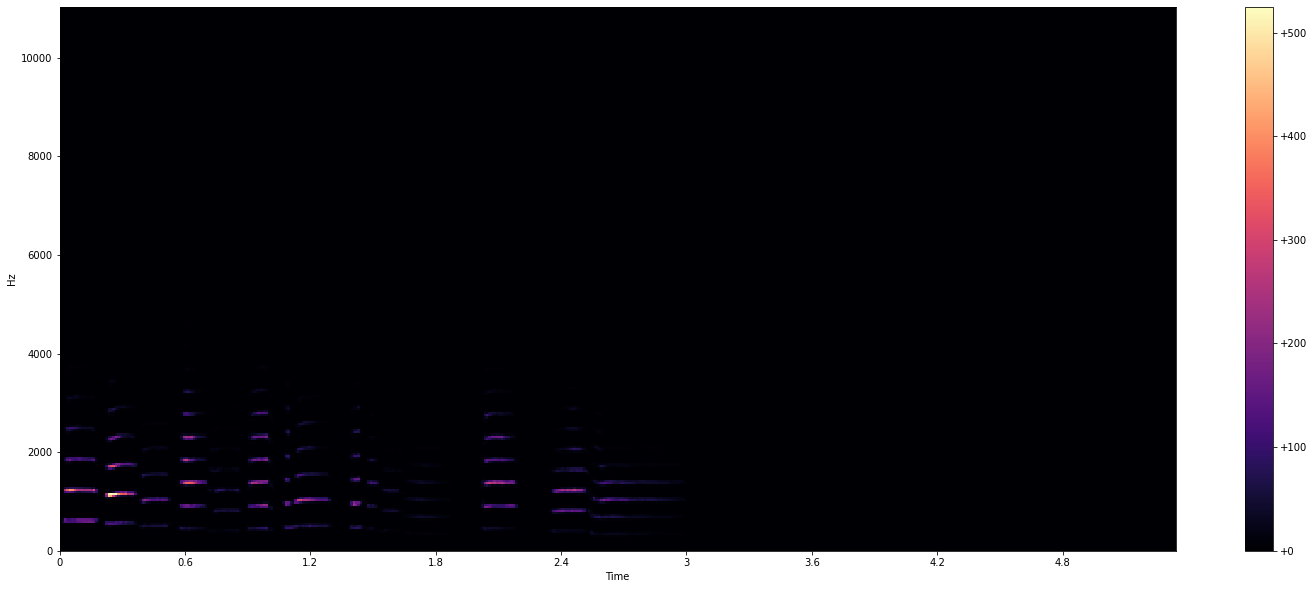

In [20]:
#Κλήση συνάρτησης εμφάνισης φασματογραφήματος
plot_spectrogram (Y_audio_sample,sr,HOP_LENGTH)

>Για να αποκτήσουμε καλύτερη εικόνα για την ενέργειας αλλά και για να προσεγγίσουμε περισσότερο τον τρόπο με τον οποίο ο άνθρωπος αντιλαμβάνεται την ενέργεια του ήχουν μπορούμε να εκφράσουμε την ενέργεια αυτή σε [dB](https://en.wikipedia.org/wiki/Decibel).

>Πηγαίος κώδικας [librosa.power_to_db](https://librosa.org/doc/latest/generated/librosa.db_to_power.html?highlight=power%20db#librosa.db_to_power).



In [22]:
Y_log_audio_sample = librosa.power_to_db(Y_audio_sample)

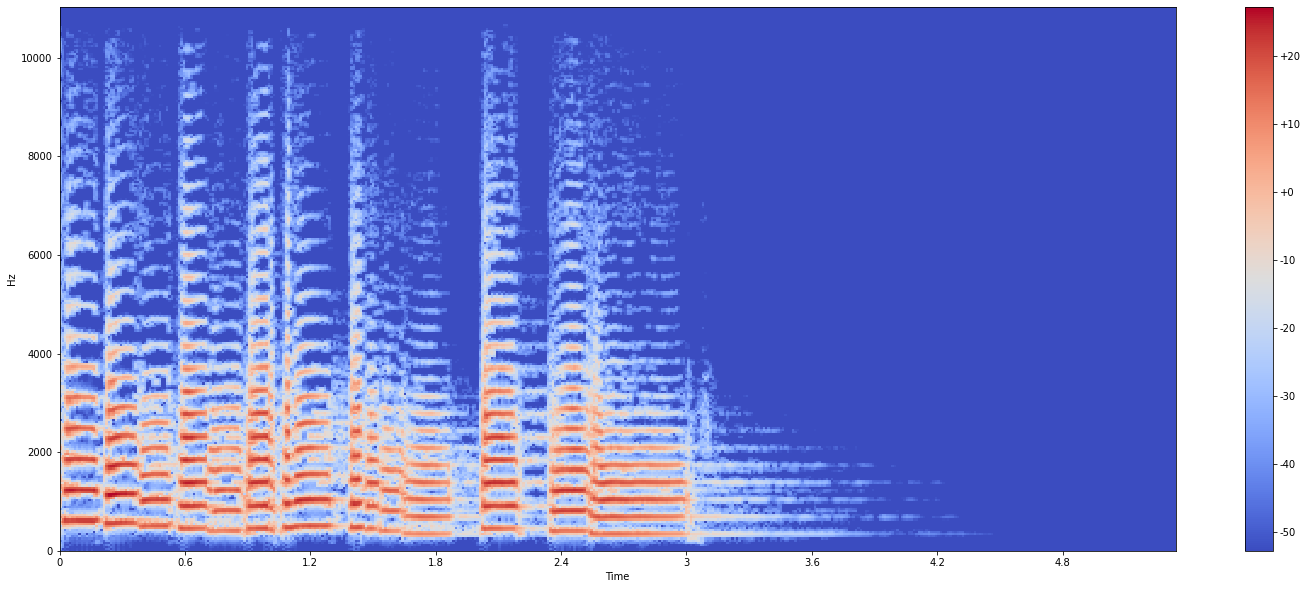

In [24]:
#Κλήση συνάρτησης εμφάνισης φασματογραφήματος
plot_spectrogram (Y_log_audio_sample,sr,HOP_LENGTH)

>Για να προσεγγίσουμε ακόμη περισσότερο την ανθρώπινη αντίληψη, μπορούμε να αναπαραστήσουμε και τον κάθετο άξονα (συχνότητα) λογαριθμικά ως εξής:

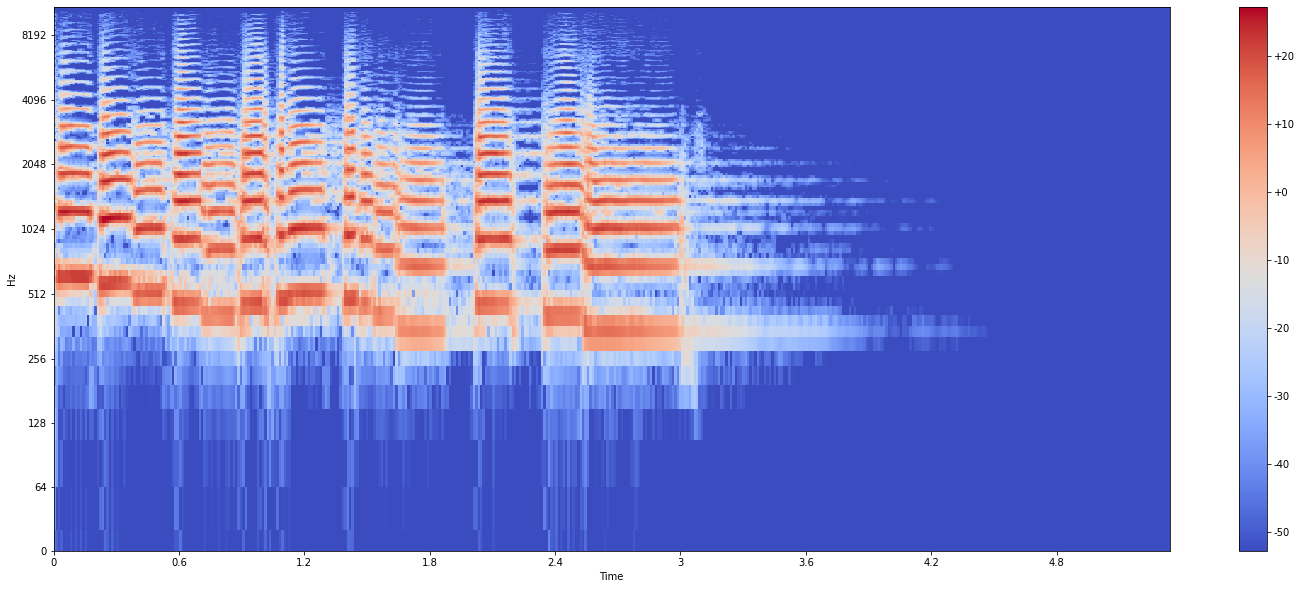

In [26]:
plot_spectrogram (Y_log_audio_sample,sr,HOP_LENGTH,y_axis="log")